In [46]:
import numpy as np
import gvar as gv
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 8]


#import warnings  
#warnings.simplefilter(action="default")

sys.path.append('../')
import fitter.data_loader as dl
import fitter.fit_manager as fm
import fitter.fitter as fit

In [47]:
from importlib import reload
reload(dl)
reload(fm)
reload(fit)

<module 'fitter.fitter' from '../fitter/fitter.py'>

In [48]:
prior = {}
prior['w0'] = gv.BufferDict()

# const
prior['w0']['c0'] = gv.gvar('1(1)')

# lo
prior['w0']['A_l'] = gv.gvar('1(1)')
prior['w0']['A_s'] = gv.gvar('1(1)')
prior['w0']['A_a'] = gv.gvar('-0.5(2.0)')

# nlo
prior['w0']['A_aa'] = gv.gvar('0(1)')
prior['w0']['A_al'] = gv.gvar('0(1)')
prior['w0']['A_as'] = gv.gvar('0(1)')
prior['w0']['A_ll'] = gv.gvar('0(1)')
prior['w0']['A_ss'] = gv.gvar('0(1)')
prior['w0']['A_ls'] = gv.gvar('0(1)')

# n2lo
prior['w0']['A_aaa'] = gv.gvar('0(1)')
prior['w0']['A_aal'] = gv.gvar('0(1)')
prior['w0']['A_aas'] = gv.gvar('0(1)')
prior['w0']['A_all'] = gv.gvar('0(1)')
prior['w0']['A_als'] = gv.gvar('0(1)')
prior['w0']['A_ass'] = gv.gvar('0(1)')
prior['w0']['A_lll'] = gv.gvar('0(1)')
prior['w0']['A_lls'] = gv.gvar('0(1)')
prior['w0']['A_lss'] = gv.gvar('0(1)')
prior['w0']['A_sss'] = gv.gvar('0(1)')

# alpha_S term
prior['w0']['A_alpha'] = gv.gvar('0(0.7)')

# log terms
prior['w0']['A_ll_g'] = gv.gvar('0(1)')
prior['w0']['A_lll_g']  = gv.gvar('0(1)')
prior['w0']['A_lll_gg'] = gv.gvar('0(1)')
prior['w0']['A_lls_g'] = gv.gvar('0(1)')

model_info = {}
model_info['name'] = 'test'
model_info['order']  = 'n2lo'
model_info['latt_ct'] = 'nlo'
model_info['include_log'] = True
model_info['include_log2'] = True
model_info['include_fv'] = True
model_info['include_alphas'] = True
model_info['exclude'] = ['A_aaa',]
model_info['chiral_cutoff'] = 'Fpi'

In [49]:
data_loader = dl.data_loader('2020_12_04-test', use_charm_reweighting=False)
gv_data = data_loader.gv_data
model_info = data_loader.get_model_info_from_name('Fpi_n3lo_log_log2_fv')
prior = data_loader.get_prior(model_info=model_info)
phys_point_data = data_loader.phys_point_data

In [50]:
fit_manager = fm.fit_manager(
    phys_point_data=phys_point_data, 
    fit_data=gv_data, 
    model_info=model_info,
    prior=prior)

In [53]:
print(fit_manager.fitter['w0']._make_empbayes_fit(empbayes_grouping='disc_only'))

1   {'disc': 1.0}
2   {'disc': 2.0}
3   {'disc': 0.01}
4   {'disc': 1.5}
5   {'disc': 0.5}
6   {'disc': 1.25}
7   {'disc': 1.5}
8   {'disc': 1.12}
9   {'disc': 1.0}
10   {'disc': 1.19}
11   {'disc': 1.25}
12   {'disc': 1.16}
13   {'disc': 1.22}
14   {'disc': 1.17}
15   {'disc': 1.16}
16   {'disc': 1.18}
17   {'disc': 1.19}
18   {'disc': 1.18}
19   {'disc': 1.17}
20   {'disc': 1.18}
21   {'disc': 1.17}
22   {'disc': 1.18}
23   {'disc': 1.18}
24   {'disc': 1.17}
25   {'disc': 1.18}
26   {'disc': 1.18}
27   {'disc': 1.18}
28   {'disc': 1.18}
29   {'disc': 1.18}
30   {'disc': 1.18}
{'disc': 1.18}
Least Square Fit:
  chi2/dof [dof] = 1.1 [22]    Q = 0.33    logGBF = 64.392

Parameters:
             c0        1.073 (70)       [       1.0 (1.0) ]  
            A_l         1.20 (41)       [       1.0 (1.0) ]  
            A_s         1.43 (41)       [       1.0 (1.0) ]  
            A_a        -0.64 (31)       [       0.0 (1.2) ]  
           A_aa        -0.64 (57)       [       0.0 (1.2) ]  


In [43]:
print(fit_manager)

Model: Fpi_n3lo_log_log2_fv
---

w0: 0.1711(10)

w0/a06: 2.998(15)     => a06/fm: 0.05708(50)
w0/a09: 1.9557(68)    => a09/fm: 0.08750(68)
w0/a12: 1.4155(33)    => a12/fm: 0.12090(84)
w0/a15: 1.1341(14)    => a15/fm: 0.15090(96)

Parameters:
             c0      1.078 (69)      [     1.0 (1.0) ]  
            A_l       1.18 (40)      [     1.0 (1.0) ]  
            A_s       1.42 (41)      [     1.0 (1.0) ]  
            A_a      -0.68 (28)      [    -0.5 (1.0) ]  
           A_aa      -0.58 (55)      [     0.0 (1.0) ]  
           A_al      -1.14 (81)      [     0.0 (1.0) ]  *
           A_as       0.89 (79)      [     0.0 (1.0) ]  
           A_ll      -0.29 (95)      [     0.0 (1.0) ]  
           A_ls       0.41 (91)      [     0.0 (1.0) ]  
           A_ss      -0.86 (79)      [     0.0 (1.0) ]  
         A_ll_g       0.50 (85)      [     0.0 (1.0) ]  
          A_aaa      -0.37 (95)      [     0.0 (1.0) ]  
          A_aal      -0.26 (98)      [     0.0 (1.0) ]  
          A_aas 

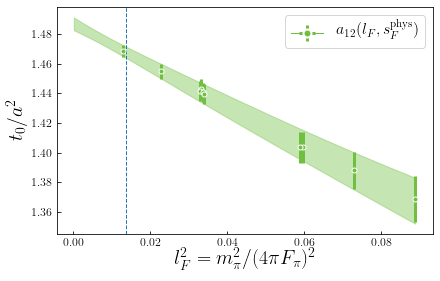

In [45]:
fit_manager.plot_interpolation(latt_spacing='a12', observable='t0')

In [292]:
print(fit_manager.fitter['t0'].fit_interpolation())

Least Square Fit:
  chi2/dof [dof] = 1.1 [22]    Q = 0.29    logGBF = 57.283

Parameters:
          c0a06       6.49 (39)      [     6.0 (1.0) ]  
          c0a09       2.80 (18)      [     3.0 (1.0) ]  
          c0a12       1.27 (17)      [     1.5 (1.0) ]  
          c0a15       0.61 (23)      [     1.0 (1.0) ]  
         k_ll_g       0.5 (1.4)      [     0.0 (2.0) ]  
            k_s       0.81 (60)      [     0.0 (2.0) ]  
           k_ss      -2.2 (1.3)      [     0.0 (2.0) ]  *
            k_l      -1.09 (72)      [     0.0 (2.0) ]  
           k_ll       1.4 (1.7)      [     0.0 (2.0) ]  
            k_a       2.65 (39)      [     2.0 (2.0) ]  
           k_al      -0.11 (84)      [     0.0 (2.0) ]  
           k_aa      -1.9 (1.6)      [     0.0 (2.0) ]  
           k_as       0.37 (68)      [     0.0 (2.0) ]  
           k_ls      -0.5 (1.6)      [     0.0 (2.0) ]  
          mpi 0   0.094560 (58)      [ 0.094560 (58) ]  
              1   0.059467 (62)      [ 0.059459 (63) ]

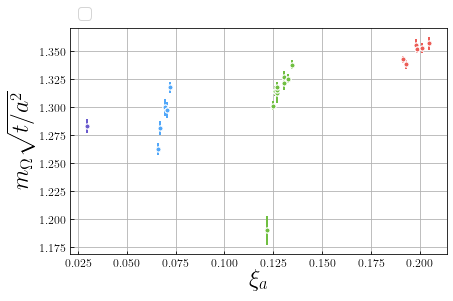

In [165]:
fit_manager.plot_parameters(xparam='a', yparam='t0')

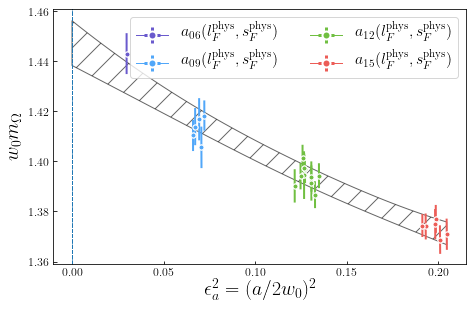

In [6]:
fit_manager.plot_fit('a', observable='w0')

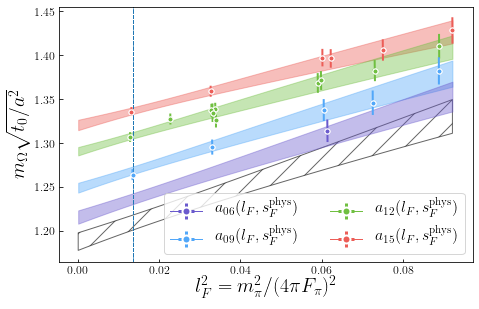

In [7]:
fit_manager.plot_fit('l', observable='t0')

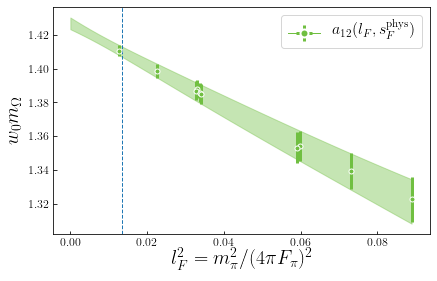

In [10]:
fit_manager.plot_interpolation('a12', observable='w0')

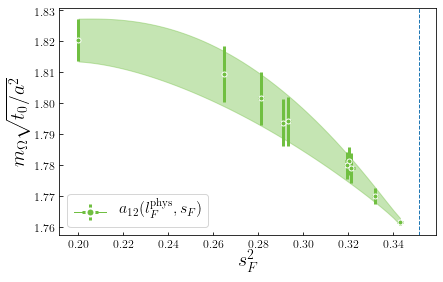

In [11]:
fit_manager.plot_interpolation('a12', param='s', observable='t0')